Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'USDT'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-02-25,1.215490,1.209580,1.210160,1.211100,6.000000e+00,1.211100
2015-02-26,1.212320,1.194710,1.210420,1.205740,6.000000e+00,1.205740
2015-03-02,0.607890,0.568314,0.571249,0.606502,3.000000e+00,0.606502
2015-03-03,0.606229,0.604416,0.605129,0.606229,3.000000e+00,0.606229
2015-03-06,1.000000,1.000000,1.000000,1.000000,9.300000e+01,1.000000
...,...,...,...,...,...,...
2021-06-16,1.000745,0.999742,1.000112,1.000745,5.542828e+10,1.000745
2021-06-17,1.002000,0.999879,1.000704,1.001749,5.825051e+10,1.001749
2021-06-18,1.001996,1.000382,1.001646,1.001451,4.832476e+10,1.001451


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2300 entries, 2015-02-25 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2300 non-null   float64
 1   Low        2300 non-null   float64
 2   Open       2300 non-null   float64
 3   Close      2300 non-null   float64
 4   Volume     2300 non-null   float64
 5   Adj Close  2300 non-null   float64
 6   Spread     2300 non-null   float64
dtypes: float64(7)
memory usage: 143.8 KB


## Plot the closing value of Tether over time

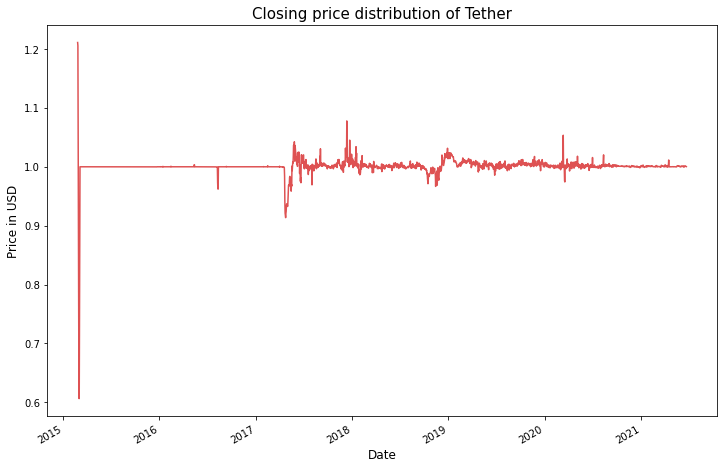

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Tether", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-02-25,1.215490,1.209580,1.210160,1.211100,6.000000e+00,1.211100
2015-02-26,1.212320,1.194710,1.210420,1.205740,6.000000e+00,1.205740
2015-03-02,0.607890,0.568314,0.571249,0.606502,3.000000e+00,0.606502
2015-03-03,0.606229,0.604416,0.605129,0.606229,3.000000e+00,0.606229
2015-03-06,1.000000,1.000000,1.000000,1.000000,9.300000e+01,1.000000
...,...,...,...,...,...,...
2021-06-16,1.000745,0.999742,1.000112,1.000745,5.542828e+10,1.000745
2021-06-17,1.002000,0.999879,1.000704,1.001749,5.825051e+10,1.001749
2021-06-18,1.001996,1.000382,1.001646,1.001451,4.832476e+10,1.001451


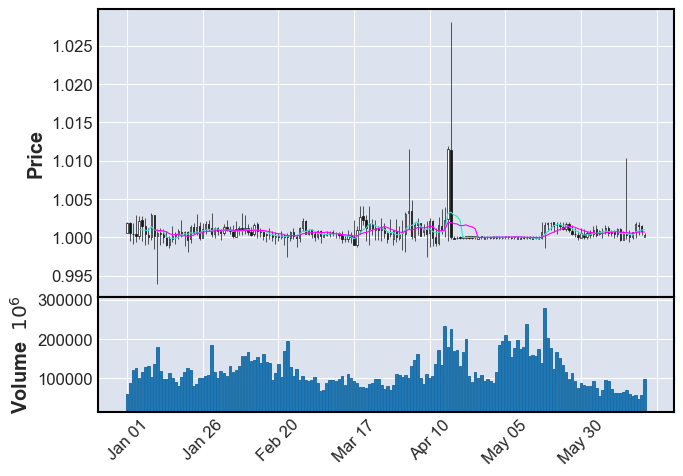

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
2129,2021-01-02,1.000600
2130,2021-01-03,1.000514
2131,2021-01-04,1.000128
2132,2021-01-05,1.002202
2133,2021-01-06,1.001528
...,...,...
2295,2021-06-16,1.000745
2296,2021-06-17,1.001749
2297,2021-06-18,1.001451
2298,2021-06-19,1.000875


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
172,2021-06-25,1.001022,0.999788,1.002213
173,2021-06-26,1.000660,0.999245,1.002009
174,2021-06-27,1.000369,0.998928,1.001955
175,2021-06-28,1.000282,0.998563,1.001972
176,2021-06-29,1.000518,0.998541,1.002332


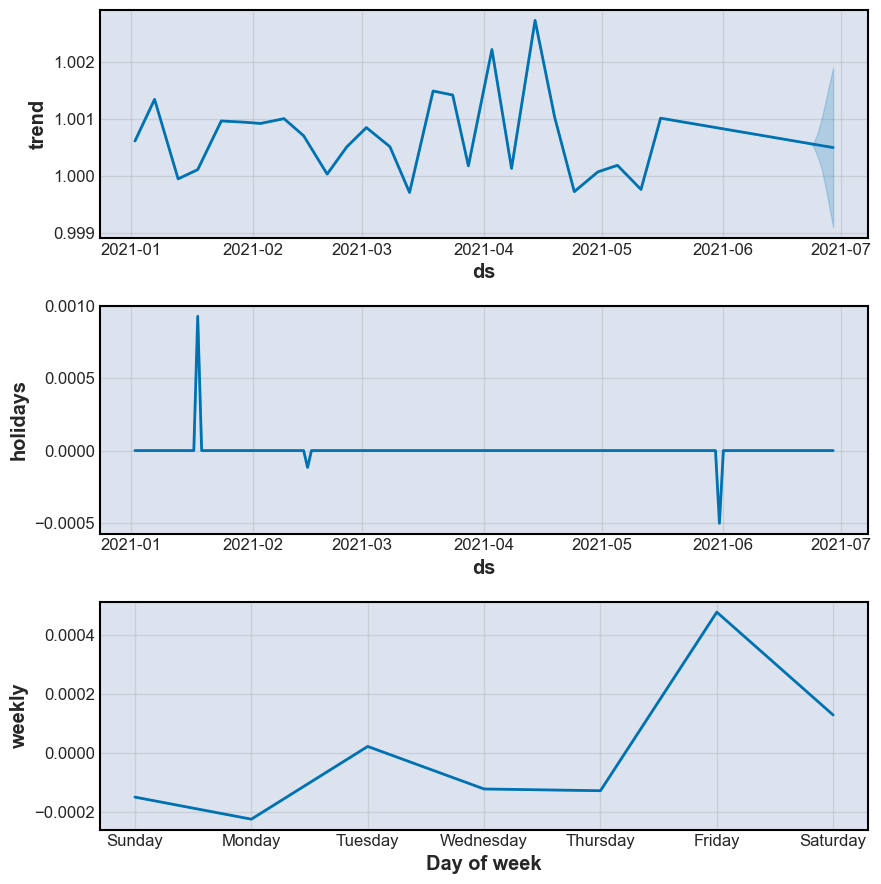

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

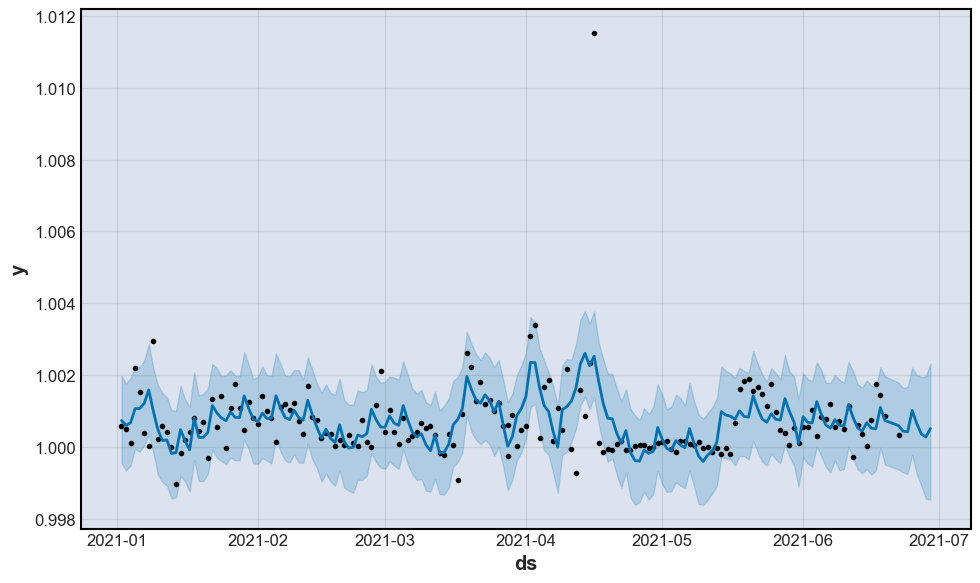

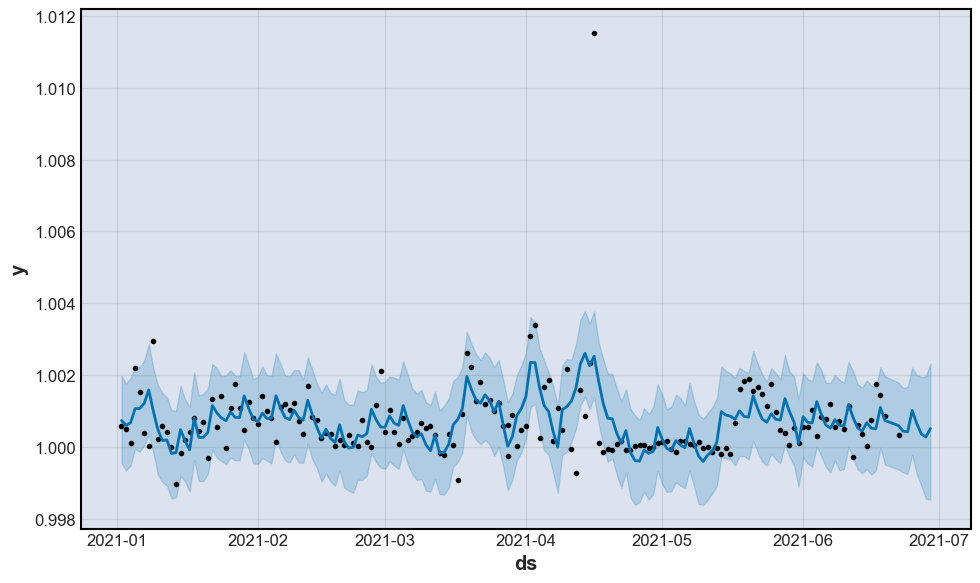

In [10]:
m.plot(forecast)